In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [3]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=20
L=n*T

N_grid=8000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

In [4]:
p=int(round(T/h))

st=200
fn=7799

In [5]:
sample=20
sig_cuts=50

In [8]:
res=np.zeros((sig_cuts, sample))
res2=np.zeros((sig_cuts, sample))

In [9]:
sig_s=np.linspace(0.0000001, 0.2, sig_cuts)

M=1.5

for jj in range(sample):
    q_s=[]
    q2_s=[]

    for ii in range(sig_cuts):

        alpha=0.99999
        sigma=0.1

        start=time.time()
        k0=np.zeros(N_grid, np.dtype(float))
        for i in range(N_grid):
            if i==0:
                k0[i]=M*2*dw
            else:
                dif=np.random.normal(0, np.sqrt(h)*sig_s[ii])
                k0[i]=alpha*k0[i-1]+dif
                if k0[i]<0:
                    k0[i]=2*k0[i-1]-k0[i]

        k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
        f=lambda t, x: 2*dw-k0_f(t)*sin(x)

        init=np.arcsin(2*dw/k0[0])

        theta=[0]*N_grid
        for i in range(N_grid):
            if i==0:
                theta[i]=init
            else:
                k1=f(t[i-1], theta[i-1])*h
                k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
                k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
                k4=f(t[i-1]+h, theta[i-1]+k3)*h

                theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

        theta=np.array(theta)
        x0=np.sin(W*t)
        y0=np.sin(W*t+theta)

        C_0=[0]*N_grid

        for i in range(N_grid):
            if (t[i]-T/2>=0) and (t[i]+T/2<=L):
                C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
            else:
                C_0[i]=nan

        phi0=np.arccos(C_0)

        k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

        mk=np.array([np.mean(k0[st:fn])]*(fn-st))
        sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
        q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
        sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
        q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
        q_s.append(q)
        q2_s.append(q2)
        stop=time.time()
        print(jj, '/', ii, sig_s[ii], ' ----- ', stop-start, '-------------', q, q2)
    res[:,jj]=q_s
    res2[:,jj]=q2_s
        
np.savetxt('PT2809_20_8000_q_sig_cor.out', res, delimiter=',')
np.savetxt('PT2809_20_8000_q2_sig_cor.out', res2, delimiter=',')

0 / 0 1e-07  -----  3.8284435272216797 ------------- 0.00770666672717 3.70640728079e-06
0 / 1 0.00408173061224  -----  3.7674777507781982 ------------- 0.0088133657418 2.99486402224e-06
0 / 2 0.00816336122449  -----  3.762481689453125 ------------- 0.011689434539 3.36181039704e-06
0 / 3 0.0122449918367  -----  3.882188081741333 ------------- 0.0113828939426 1.08718249544e-05
0 / 4 0.016326622449  -----  3.7257726192474365 ------------- 0.0501209758489 8.09098370229e-06
0 / 5 0.0204082530612  -----  3.7549080848693848 ------------- 0.0702231435187 2.12571347098e-05
0 / 6 0.0244898836735  -----  3.7605228424072266 ------------- 0.0402859715946 2.53551242678e-05
0 / 7 0.0285715142857  -----  3.772120475769043 ------------- 0.0938739750044 2.86550605816e-05
0 / 8 0.032653144898  -----  3.7330543994903564 ------------- 0.0688223835817 5.03733497623e-05
0 / 9 0.0367347755102  -----  3.7403438091278076 ------------- 0.0463911378607 4.38012354446e-05
0 / 10 0.0408164061224  -----  3.7365024089

1 / 37 0.151020432653  -----  4.4479310512542725 ------------- 0.105762320808 0.000670603862115
1 / 38 0.155102063265  -----  4.268033504486084 ------------- 4.91132734723 0.213398000395
1 / 39 0.159183693878  -----  4.4005467891693115 ------------- 0.106380971444 0.000398800580358
1 / 40 0.16326532449  -----  4.270395994186401 ------------- 0.139996678518 0.000424538262591
1 / 41 0.167346955102  -----  4.297150611877441 ------------- 0.152833202438 0.000621392475833
1 / 42 0.171428585714  -----  4.224493980407715 ------------- 0.122640509977 0.000573401440716
1 / 43 0.175510216327  -----  4.215125322341919 ------------- 0.211639829897 0.00239478252303
1 / 44 0.179591846939  -----  4.2217490673065186 ------------- 3.2921069024 0.149814873887
1 / 45 0.183673477551  -----  4.191014528274536 ------------- 0.0548102197688 0.000838657232669
1 / 46 0.187755108163  -----  4.279625177383423 ------------- 0.0637439429279 0.00043958147582
1 / 47 0.191836738776  -----  4.238365650177002 ---------

3 / 24 0.0979592346939  -----  4.3736732006073 ------------- 0.179967343983 0.000402944172106
3 / 25 0.102040865306  -----  4.341672420501709 ------------- 0.0695427699357 0.000389155515413
3 / 26 0.106122495918  -----  4.260791778564453 ------------- 0.165013989933 0.000352680641039
3 / 27 0.110204126531  -----  4.316266775131226 ------------- 0.122653548848 0.00077637298318
3 / 28 0.114285757143  -----  4.267753839492798 ------------- 0.0762377949043 0.000544561983938
3 / 29 0.118367387755  -----  4.271396160125732 ------------- 0.097357215993 0.000241817098051
3 / 30 0.122449018367  -----  4.377105951309204 ------------- 0.119344895396 0.000383974269809
3 / 31 0.12653064898  -----  4.3395678997039795 ------------- 0.131554816398 0.000285878122044
3 / 32 0.130612279592  -----  4.301849842071533 ------------- 0.344307384296 0.000563330024145
3 / 33 0.134693910204  -----  4.3445916175842285 ------------- 0.129843037333 0.000533790012719
3 / 34 0.138775540816  -----  4.219574928283691 -

5 / 11 0.0448980367347  -----  4.087862730026245 ------------- 0.0561376760071 8.09379085928e-05
5 / 12 0.0489796673469  -----  3.9123854637145996 ------------- 0.0893252794964 4.4659795542e-05
5 / 13 0.0530612979592  -----  4.06730318069458 ------------- 0.146741244433 0.000144189362235
5 / 14 0.0571429285714  -----  3.9359302520751953 ------------- 0.144229513169 0.000174497142213
5 / 15 0.0612245591837  -----  3.8084211349487305 ------------- 0.255276062376 8.18803881876e-05
5 / 16 0.0653061897959  -----  3.930044412612915 ------------- 0.0833273068447 0.000134101868348
5 / 17 0.0693878204082  -----  3.7743515968322754 ------------- 0.134959851493 0.000104059299159
5 / 18 0.0734694510204  -----  4.081660270690918 ------------- 0.0676754932833 0.000178530782371
5 / 19 0.0775510816327  -----  4.2803778648376465 ------------- 0.127671726586 8.7919948485e-05
5 / 20 0.0816327122449  -----  4.209521055221558 ------------- 0.130307195951 0.000135864905131
5 / 21 0.0857143428571  -----  3.8

6 / 47 0.191836738776  -----  4.475518703460693 ------------- 0.0708676013446 0.000952059990699
6 / 48 0.195918369388  -----  4.254107713699341 ------------- 0.0619975065583 0.00135462472998
6 / 49 0.2  -----  4.057782888412476 ------------- 0.196208765838 0.00207719221783
7 / 0 1e-07  -----  4.103437662124634 ------------- 0.00770666132609 3.70639402335e-06
7 / 1 0.00408173061224  -----  3.8716163635253906 ------------- 0.00890113575424 3.8899265673e-06
7 / 2 0.00816336122449  -----  4.069646596908569 ------------- 0.0105621185526 5.10405503676e-06
7 / 3 0.0122449918367  -----  3.767852783203125 ------------- 0.0159299411915 7.67636839442e-06
7 / 4 0.016326622449  -----  3.803457736968994 ------------- 0.0257696536498 1.2973198066e-05
7 / 5 0.0204082530612  -----  3.760486125946045 ------------- 0.0688471305005 1.10687280133e-05
7 / 6 0.0244898836735  -----  3.8033154010772705 ------------- 0.0967234998711 1.63809500258e-05
7 / 7 0.0285715142857  -----  3.898822784423828 -------------

8 / 33 0.134693910204  -----  4.130748271942139 ------------- 0.0254799594992 0.00030210948675
8 / 34 0.138775540816  -----  4.035184860229492 ------------- 0.0689869940151 0.000275296241644
8 / 35 0.142857171429  -----  4.049367427825928 ------------- 2.37858885313 0.128144106625
8 / 36 0.146938802041  -----  4.260133504867554 ------------- 0.186013099875 0.000388218675125
8 / 37 0.151020432653  -----  4.030714750289917 ------------- 2.77584318432 0.098434028772
8 / 38 0.155102063265  -----  4.506794691085815 ------------- 0.131114276602 0.000719738365143
8 / 39 0.159183693878  -----  4.184856414794922 ------------- 0.0909209026954 0.000786863759087
8 / 40 0.16326532449  -----  3.8771355152130127 ------------- 0.142645443487 0.000420168557589
8 / 41 0.167346955102  -----  3.8291685581207275 ------------- 0.070013993009 0.00295618330986
8 / 42 0.171428585714  -----  4.406363248825073 ------------- 0.272073231446 0.00249053035045
8 / 43 0.175510216327  -----  4.882863521575928 ---------

10 / 20 0.0816327122449  -----  4.193912506103516 ------------- 0.191543088358 0.000190773371427
10 / 21 0.0857143428571  -----  4.075133562088013 ------------- 0.0547924464763 0.000260723657313
10 / 22 0.0897959734694  -----  4.00993013381958 ------------- 0.18556878368 0.000211426506218
10 / 23 0.0938776040816  -----  4.1233131885528564 ------------- 0.0397833907209 0.000233946139501
10 / 24 0.0979592346939  -----  4.107260227203369 ------------- 0.133937548931 0.000608048201498
10 / 25 0.102040865306  -----  4.029085636138916 ------------- 0.108532250677 0.000298031378878
10 / 26 0.106122495918  -----  4.086595058441162 ------------- 0.143755408146 0.000389657672523
10 / 27 0.110204126531  -----  4.089686155319214 ------------- 0.056204499787 0.000391150657466
10 / 28 0.114285757143  -----  4.017740726470947 ------------- 0.160314740097 0.000366664647343
10 / 29 0.118367387755  -----  4.200668811798096 ------------- 0.320867936505 0.000355577847934
10 / 30 0.122449018367  -----  4.0

12 / 6 0.0244898836735  -----  4.271696329116821 ------------- 0.0750477674096 2.10906994081e-05
12 / 7 0.0285715142857  -----  4.1989500522613525 ------------- 0.0318704068778 2.26331736505e-05
12 / 8 0.032653144898  -----  4.550731897354126 ------------- 0.0335743675538 3.65487040974e-05
12 / 9 0.0367347755102  -----  4.19082498550415 ------------- 0.0356519610234 5.87695898542e-05
12 / 10 0.0408164061224  -----  4.539209842681885 ------------- 0.0264328436631 4.33887183229e-05
12 / 11 0.0448980367347  -----  4.4835593700408936 ------------- 0.165280479306 4.59331258616e-05
12 / 12 0.0489796673469  -----  4.466446399688721 ------------- 0.169951791873 6.59083988104e-05
12 / 13 0.0530612979592  -----  4.2260048389434814 ------------- 0.0437624955445 6.7275156984e-05
12 / 14 0.0571429285714  -----  4.3289406299591064 ------------- 0.027062040486 0.000142960659737
12 / 15 0.0612245591837  -----  4.2728235721588135 ------------- 0.0203867793578 0.000172985567211
12 / 16 0.0653061897959  

13 / 42 0.171428585714  -----  4.303892135620117 ------------- 0.0850605844645 0.000756466373437
13 / 43 0.175510216327  -----  4.24744725227356 ------------- 0.0795386629445 0.000823667485632
13 / 44 0.179591846939  -----  4.234757900238037 ------------- 0.355796694986 0.000786163841166
13 / 45 0.183673477551  -----  4.28606915473938 ------------- 0.230220341721 0.000790159793812
13 / 46 0.187755108163  -----  4.199354887008667 ------------- 0.0342249211744 0.000797444492051
13 / 47 0.191836738776  -----  4.29144549369812 ------------- 0.134928346776 0.00142073211737
13 / 48 0.195918369388  -----  4.258258581161499 ------------- 5.72739616926 0.387155438275
13 / 49 0.2  -----  4.288355588912964 ------------- 0.0905325637004 0.000940389062952
14 / 0 1e-07  -----  4.259810209274292 ------------- 0.00770668085062 3.70639926003e-06
14 / 1 0.00408173061224  -----  4.268052577972412 ------------- 0.00781807227972 5.92458273981e-06
14 / 2 0.00816336122449  -----  4.218578815460205 ----------

15 / 28 0.114285757143  -----  4.055773735046387 ------------- 0.127555593045 0.000482295115305
15 / 29 0.118367387755  -----  4.188797950744629 ------------- 0.109968560362 0.000629754710012
15 / 30 0.122449018367  -----  4.135563611984253 ------------- 0.039682041035 0.000341445629887
15 / 31 0.12653064898  -----  3.800264358520508 ------------- 0.0317862422687 0.000714334237568
15 / 32 0.130612279592  -----  3.6888155937194824 ------------- 0.0737380462648 0.000448162829329
15 / 33 0.134693910204  -----  3.715522289276123 ------------- 0.207907317237 0.000307844771343
15 / 34 0.138775540816  -----  3.6883225440979004 ------------- 0.0415177935909 0.000304551566732
15 / 35 0.142857171429  -----  3.76488995552063 ------------- 0.118148781345 0.00156257054486
15 / 36 0.146938802041  -----  3.754161834716797 ------------- 0.355688560799 0.00996120576246
15 / 37 0.151020432653  -----  3.7662971019744873 ------------- 7.07115518121 0.275344645337
15 / 38 0.155102063265  -----  3.776110410

17 / 14 0.0571429285714  -----  3.74125599861145 ------------- 0.0384342446699 0.000283405002838
17 / 15 0.0612245591837  -----  3.6890597343444824 ------------- 0.0632764032216 7.99418367315e-05
17 / 16 0.0653061897959  -----  3.6855854988098145 ------------- 0.0363575536886 0.00012316160357
17 / 17 0.0693878204082  -----  3.75472354888916 ------------- 0.156924759911 0.000129115399044
17 / 18 0.0734694510204  -----  3.7811222076416016 ------------- 0.093498761844 0.000163574021425
17 / 19 0.0775510816327  -----  3.7676286697387695 ------------- 0.240176755846 0.000148341880971
17 / 20 0.0816327122449  -----  3.705552101135254 ------------- 0.062250416268 0.000334849392292
17 / 21 0.0857143428571  -----  3.8094406127929688 ------------- 0.0778916673571 0.0002549764085
17 / 22 0.0897959734694  -----  3.7493948936462402 ------------- 0.109135242115 0.000205178700945
17 / 23 0.0938776040816  -----  3.6733312606811523 ------------- 0.0531873699002 0.000903963415119
17 / 24 0.0979592346939

19 / 0 1e-07  -----  4.544396877288818 ------------- 0.00770670268709 3.7064164616e-06
19 / 1 0.00408173061224  -----  4.15339207649231 ------------- 0.00801314277106 3.6375914659e-06
19 / 2 0.00816336122449  -----  4.378957509994507 ------------- 0.010602365631 7.03354696881e-06
19 / 3 0.0122449918367  -----  3.87043833732605 ------------- 0.0158683019469 6.70754070913e-06
19 / 4 0.016326622449  -----  4.171521425247192 ------------- 0.0208947918601 1.21846634096e-05
19 / 5 0.0204082530612  -----  4.21166729927063 ------------- 0.0481515325199 1.76217235801e-05
19 / 6 0.0244898836735  -----  4.070619344711304 ------------- 0.0605763968746 1.94428115467e-05
19 / 7 0.0285715142857  -----  4.069113492965698 ------------- 0.0466951885103 2.82881474154e-05
19 / 8 0.032653144898  -----  4.087909698486328 ------------- 0.165178119293 1.60326343383e-05
19 / 9 0.0367347755102  -----  4.054353713989258 ------------- 0.104325789636 2.86556185306e-05
19 / 10 0.0408164061224  -----  4.195928096771

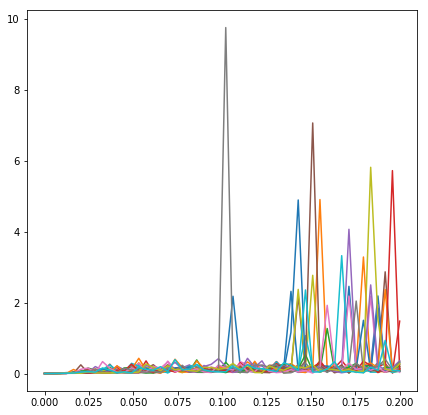

In [13]:
plt.figure(figsize=(7,7))
for i in range(sample):
    plt.plot(sig_s, res[:, i])
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

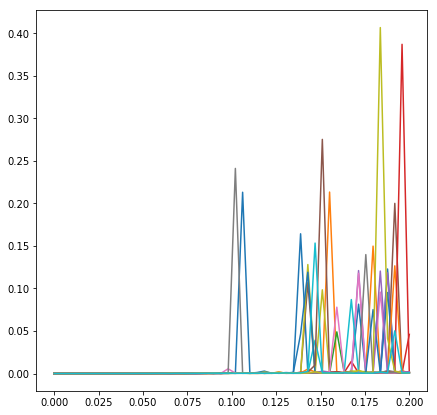

In [14]:
plt.figure(figsize=(7,7))
for i in range(sample):
    plt.plot(sig_s, res2[:, i])
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

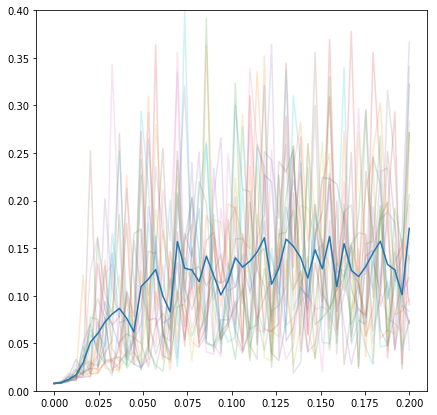

In [33]:
res_cor=res
for i in range(sample):
    for j in range(sig_cuts):
        if res_cor[j, i]>0.4:
            res_cor[j, i]=res_cor[j, i-1]

plt.figure(figsize=(7,7))
plt.ylim(0,.4)
for i in range(sample):
    plt.plot(sig_s, res_cor[:, i], alpha=0.2)
plt.plot(sig_s, np.mean(res_cor, axis=1))    
plt.show()

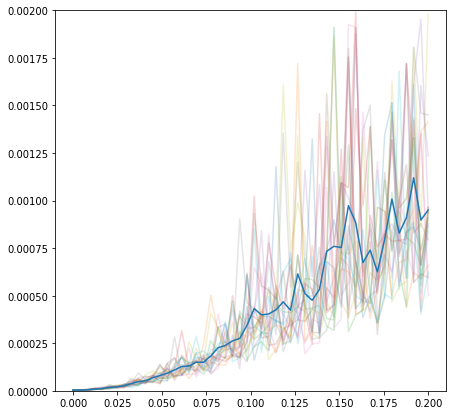

In [31]:
res2_cor=res2
for i in range(sample):
    for j in range(sig_cuts):
        if res2_cor[j, i]>0.002:
            res2_cor[j, i]=res2_cor[j, i-1]
plt.figure(figsize=(7,7))
plt.ylim(0,0.002)
for i in range(sample):
    plt.plot(sig_s, res2_cor[:, i], alpha=0.2)
plt.plot(sig_s, np.mean(res2_cor, axis=1))    
plt.show()